# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
cities

['karratha',
 'punta arenas',
 'marsabit',
 'ushuaia',
 'cape town',
 'ponta do sol',
 'saskylakh',
 'pevek',
 'manica',
 'rikitea',
 'rio gallegos',
 'kozachi laheri',
 'ancud',
 'lubango',
 'mayya',
 'bayanday',
 'novyy urengoy',
 'yellowknife',
 'port macquarie',
 'tiksi',
 'srednekolymsk',
 'severo-kurilsk',
 'chokurdakh',
 'saint-pierre',
 'new norfolk',
 'tuktoyaktuk',
 'salalah',
 'zabkowice slaskie',
 'lagoa',
 'maramag',
 'miranorte',
 'olafsvik',
 'calama',
 'talnakh',
 'nizhneyansk',
 'geraldton',
 'kavieng',
 'flinders',
 'barentsburg',
 'maldonado',
 'ust-kuyga',
 'barrow',
 'saint-francois',
 'quang ngai',
 'maltahohe',
 'mataura',
 'tuatapere',
 'busselton',
 'sao joao da barra',
 'tupancireta',
 'robertsport',
 'kapaa',
 'norman wells',
 'phan rang',
 'farmington',
 'dongsheng',
 'jamestown',
 'kodiak',
 'iraquara',
 'krasnoselkup',
 'marcona',
 'kribi',
 'santa lucia',
 'esperance',
 'bathsheba',
 'pringsewu',
 'chesma',
 'avarua',
 'tual',
 'atambua',
 'legnago',
 'ba

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Call the open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
data_list = []
city_name = []
lat = []
lon = []
temp_max = []
hum = []
cloud = []
wind = []
country = []
date = []
record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")
# Start a loop in big list
for city in cities:
    try:
        # To get all data in JSON format
        city_url = url + "appid=" + weather_api_key + '&q=' + city
        # Store JSON in data
        response = requests.get(city_url).json()
        # append data to list
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']["temp_max"])
        hum.append(response['main']['humidity'])
        cloud.append(response["clouds"]["all"])
        wind.append(response['wind']["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
# data_list.append({"city_name": City, "lat": Lat, "lon": Lng, "temp_max": MaxTemp,
#                    "hum": Humidity, "cloud": Cloudiness, "wind": WindSpeed,
#                      "country": Country, "date": Date})
        print("Processing Record of " + city)
#         #record = record + 1
    except:
        print("City not found.. skipping")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record of karratha
Processing Record of punta arenas
Processing Record of marsabit
Processing Record of ushuaia
Processing Record of cape town
Processing Record of ponta do sol
Processing Record of saskylakh
Processing Record of pevek
Processing Record of manica
Processing Record of rikitea
Processing Record of rio gallegos
Processing Record of kozachi laheri
Processing Record of ancud
Processing Record of lubango
Processing Record of mayya
Processing Record of bayanday
Processing Record of novyy urengoy
Processing Record of yellowknife
Processing Record of port macquarie
Processing Record of tiksi
Processing Record of srednekolymsk
Processing Record of severo-kurilsk
Processing Record of chokurdakh
Processing Record of saint-pierre
Processing Record of new norfolk
Processing Record of tuktoyaktuk
Processing Record of salalah
Processing Record of zabkowice slaskie
Processing Record of lagoa
Processing Record of maramag

Processing Record of ilulissat
Processing Record of fortuna
Processing Record of hirara
City not found.. skipping
Processing Record of irece
Processing Record of puerto cabezas
Processing Record of coruripe
City not found.. skipping
Processing Record of alice springs
Processing Record of iqaluit
Processing Record of boyolangu
Processing Record of cortes
Processing Record of foligno
Processing Record of nova venecia
Processing Record of oliveira dos brejinhos
Processing Record of namtsy
Processing Record of turukhansk
Processing Record of alofi
Processing Record of adrar
Processing Record of khatanga
Processing Record of casimiro de abreu
Processing Record of penzance
Processing Record of klaksvik
Processing Record of touros
Processing Record of ust-maya
Processing Record of ogembo
Processing Record of dorokhovo
Processing Record of mokhsogollokh
City not found.. skipping
Processing Record of marigot
City not found.. skipping
Processing Record of port arthur
Processing Record of havre-s

Processing Record of baykit
Processing Record of abu dhabi
City not found.. skipping
City not found.. skipping
Processing Record of marienburg
Processing Record of batemans bay
City not found.. skipping
Processing Record of keroka
City not found.. skipping
Processing Record of port lincoln
Processing Record of fairbanks
Processing Record of ushtobe
Processing Record of banda aceh
Processing Record of marion
Processing Record of pyapon
City not found.. skipping
Processing Record of general roca
Processing Record of innisfail
Processing Record of san andres
Processing Record of fortuna foothills
Processing Record of aitape
Processing Record of nizwa
Processing Record of oriximina
Processing Record of mpigi
Processing Record of davlekanovo
Processing Record of carauari
Processing Record of wanning
City not found.. skipping
Processing Record of pacific grove
Processing Record of douglas
Processing Record of viedma
Processing Record of serrinha
Processing Record of general salgado
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
dict = {"City": city_name, "Lat": lat, "Lng": lon, "Max Temp": temp_max,
        "Humidity": hum, "Cloudiness": cloud, "Wind Speed": wind,
        "Country": country, "Date": date}  
    
df = pd.DataFrame(dict) 
    
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.74,116.85,301.02,18,0,8.91,AU,1598060623
1,Punta Arenas,-53.15,-70.92,278.71,80,100,10.30,CL,1598060467
2,Marsabit,2.33,37.99,288.14,97,100,9.37,KE,1598060625
3,Ushuaia,-54.80,-68.30,278.15,80,75,2.10,AR,1598060622
4,Cape Town,-33.93,18.42,280.37,93,0,2.10,ZA,1598060060


In [10]:
df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
above100_humidity = df.loc[(df['Humidity'] > 100)]
above100_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df.to_csv('../Output/weather_data.csv')

## Latitude vs. Temperature Plot

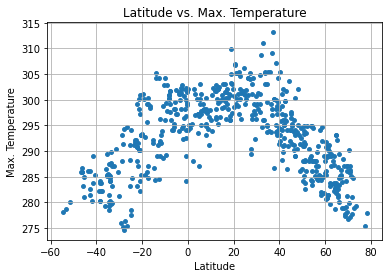

In [19]:
# Create a scatter plot
plt.scatter(df["Lat"], df["Max Temp"], marker="o", s=15)

# Modify graph
plt.title("Latitude vs. Max. Temperature")
plt.ylabel("Max. Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Export plot
plt.savefig("../Output/Lat_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

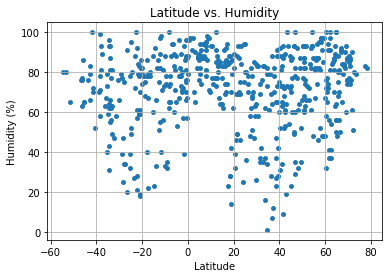

In [20]:
# Create a scatter plot
plt.scatter(df["Lat"], df["Humidity"], marker="o", s=15)

# Modify graph
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Export plot
plt.savefig("../Output/Lat_vs_Hum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

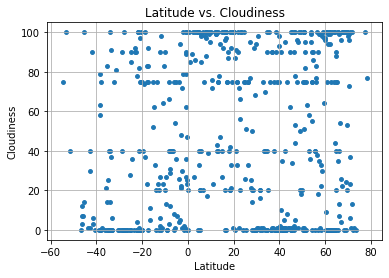

In [21]:
# Create a scatter plot
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", s=15)

# Modify graph
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Export plot
plt.savefig("../Output/Lat_vs_Cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

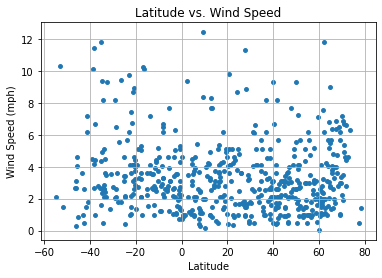

In [22]:
# Create a scatter plot
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", s=15)

# Modify graph
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Export plot
plt.savefig("../Output/Lat_vs_WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotlinregress(x_values,y_values,x_label,y_label,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"R-squared value: {rvalue}")
    linregress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,linregress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df.loc[df["Lat"] >= 0.0]
northern_df.reset_index(inplace=True)

southern_df = df.loc[df["Lat"] < 0.0]
southern_df.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value: -0.7436676888710683


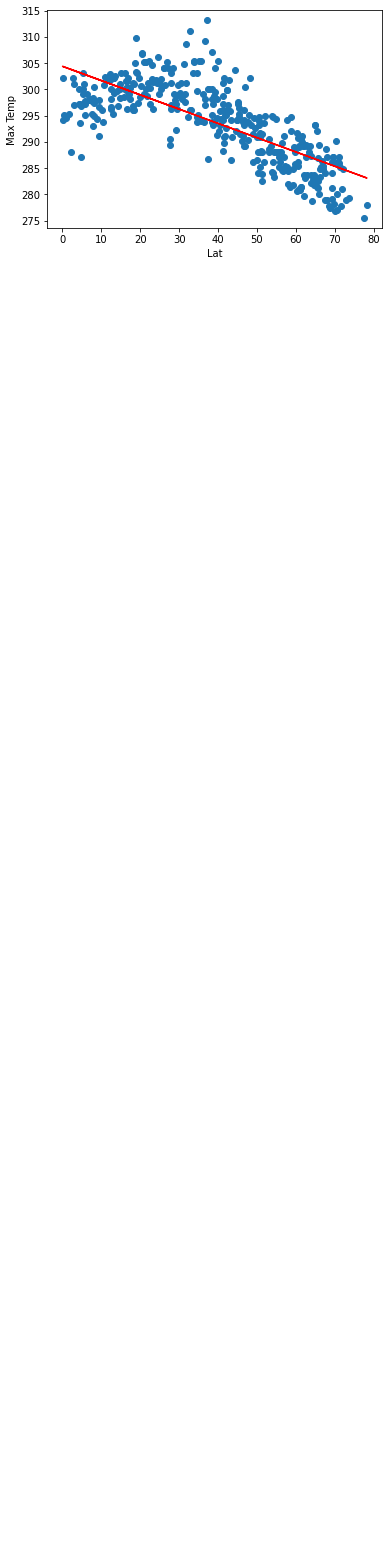

In [32]:
x_label = "Lat"
y_label = "Max Temp"
lblpos = (0,25)
plotlinregress(northern_df[x_label],northern_df[y_label],x_label,y_label,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value: 0.7400701924423198


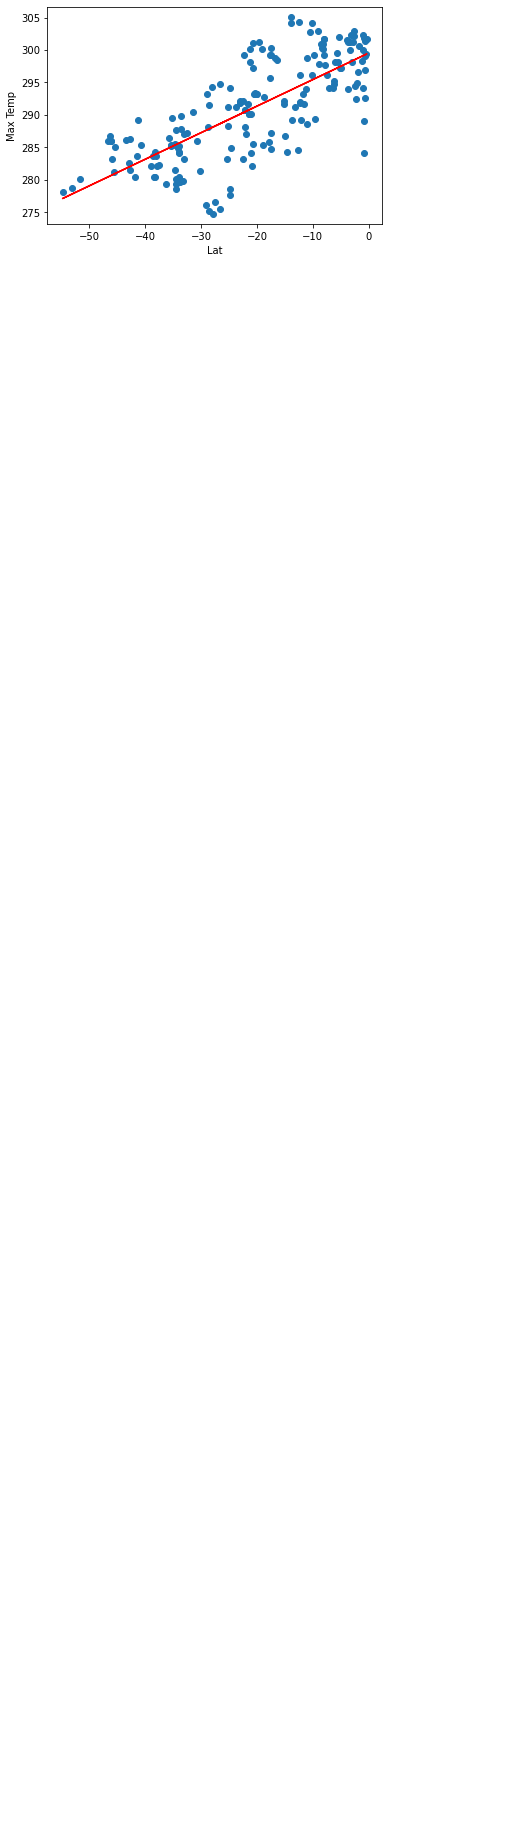

In [33]:
x_label = "Lat"
y_label = "Max Temp"
lblpos = (0,25)
plotlinregress(southern_df[x_label],southern_df[y_label],x_label,y_label,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value: -0.03310749526219231


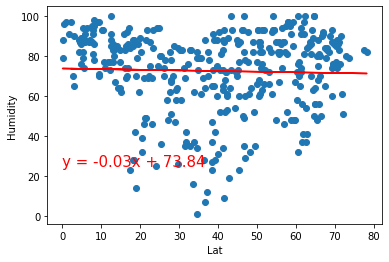

In [35]:
x_label = "Lat"
y_label = "Humidity"
plotlinregress(northern_df[x_label],northern_df[y_label],x_label,y_label,lblpos,5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value: 0.08286134282696493


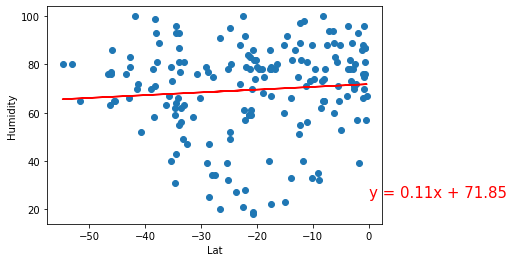

In [36]:
x_label = "Lat"
y_label = "Humidity"
plotlinregress(southern_df[x_label],southern_df[y_label],x_label,y_label,lblpos,5)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value: -0.12539958589221137


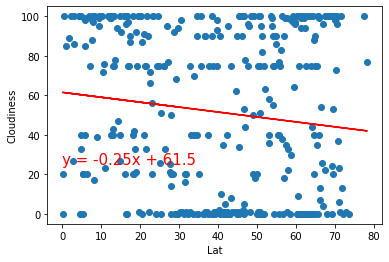

In [37]:
x_label = "Lat"
y_label = "Cloudiness"
plotlinregress(northern_df[x_label],northern_df[y_label],x_label,y_label,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value: 0.13053222894113156


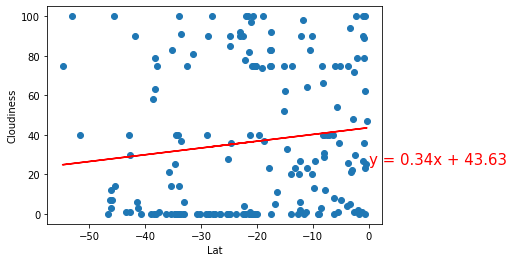

In [38]:
x_label = "Lat"
y_label = "Cloudiness"
plotlinregress(southern_df[x_label],southern_df[y_label],x_label,y_label,lblpos,5)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value: 0.05461948109730976


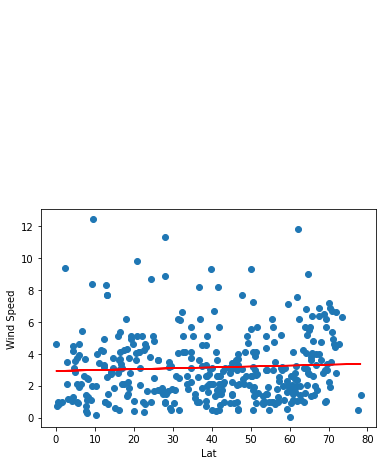

In [39]:
x_label = "Lat"
y_label = "Wind Speed"
plotlinregress(northern_df[x_label],northern_df[y_label],x_label,y_label,lblpos,5)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value: -0.12720572974006097


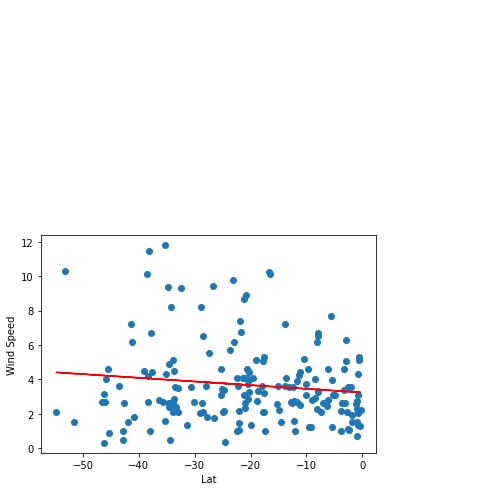

In [40]:
x_label = "Lat"
y_label = "Wind Speed"
plotlinregress(southern_df[x_label],southern_df[y_label],x_label,y_label,lblpos,5)